# Rozkład Klein-Nishina
Czyli rozkład prawdopodobieństwa rozproszenia fotonu pod danym kątem w efekcie Comptona.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## W poniższej komórce definiowana jest funkcja obliczająca prawdopodobieństwo w zależności od kąta rozproszenia kwantu.
Funkcja zwraca 2 wektory:
1. wektor prawdopodobieństw
2. wektor kątów rozproszenia

Argumentem funkcji jest energia kwantu gamma wyrażona w MeV. Możliwe jest podanie energii w jednostkach z grupy \[eV, keV, MeV, J\], jednak jeśli jest to inna jednostka niż MeV, to należy dodać argument unit="\<jednostka\>".

In [2]:
def K_NDistribution(gamma_energy, **kwargs):
    """
    Calculate cross section of compton scattering with given gamma photon energy from Klein - Nishina equation[1]
    Usage:
    K_NDistribution(photon energy in MeV)
    K_NDistribution(photon energy, unit = 'ev')
    
    List of possible units (str, case insensitive) ['eV', 'keV', 'MeV', 'J']
    
    You may also define number of angles between 0 and 2pi by giving 'fi_number' argument:
    K_NDistribution(photon energy in MeV, fi_number = 200)
    
    Returns:
    tuple of numpy arrays: (cross_section, angles)
    """
    electron_mass = 9.109*10**-31
    electron_charge = 1.6*10**-19
    c = 2.998*10**8
    h = 6.626*10**-34
    electron_radius = electron_charge**2/(electron_mass*c**2)
    
    if 'fi_number' in kwargs:
        fi = np.linspace(0, 2*np.pi, kwargs['fi_number'])
    else:
        fi = np.linspace(0, 2*np.pi, 720)
        
    if 'unit' in kwargs:
        unit = kwargs['unit'].lower()
        if unit == 'mev':
            unit_factor = 10**6
        elif unit == 'kev':
            unit_factor = 10**3
        elif unit == 'ev':
            unit_factor = 1
        elif unit == 'j':
            unit_factor = 1/electron_charge
    else:
        unit_factor = 10**6
            
    hv = gamma_energy
    hv = hv*unit_factor*electron_charge
    hv2 = hv/(1+(hv/(electron_mass*c**2))*(1-np.cos(fi)))
    
    return (electron_radius/2 * (hv2/hv)**2 * (hv/hv2 + hv2/hv - (np.sin(fi))**2), fi)

# Wizualizacja

## Współrzędne biegunowe

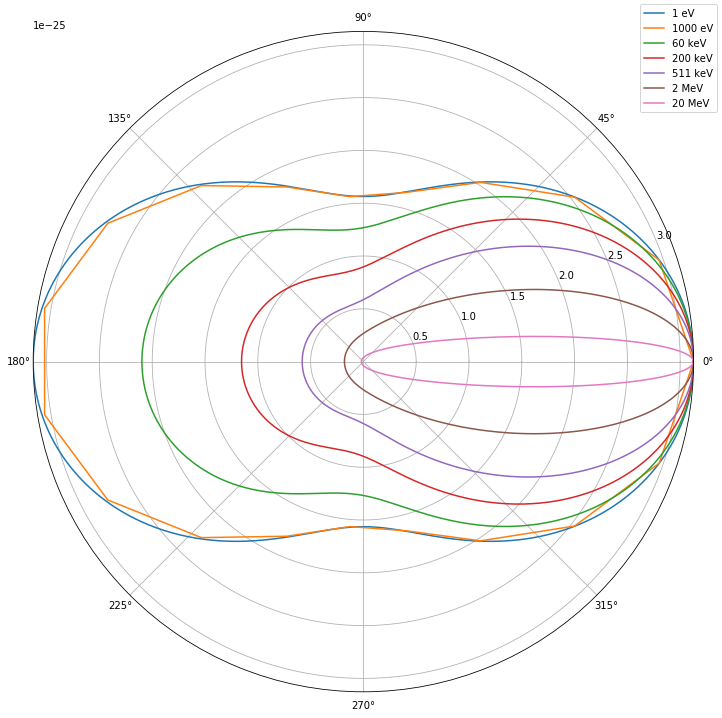

In [3]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='polar')
ax.plot(*K_NDistribution(1, unit='eV')[::-1], label = '1 eV')
ax.plot(*K_NDistribution(1000, unit='eV', fi_number=20)[::-1], label = '1000 eV')
ax.plot(*K_NDistribution(60, unit='keV')[::-1], label = '60 keV')
ax.plot(*K_NDistribution(200, unit='kev')[::-1], label = '200 keV')
ax.plot(*K_NDistribution(511, unit='keV')[::-1], label = '511 keV')
ax.plot(*K_NDistribution(2)[::-1], label = '2 MeV')
ax.plot(*K_NDistribution(20, unit='mev')[::-1], label = '20 MeV')
fig.legend()
plt.tight_layout()

## Współrzędne kartezjańskie

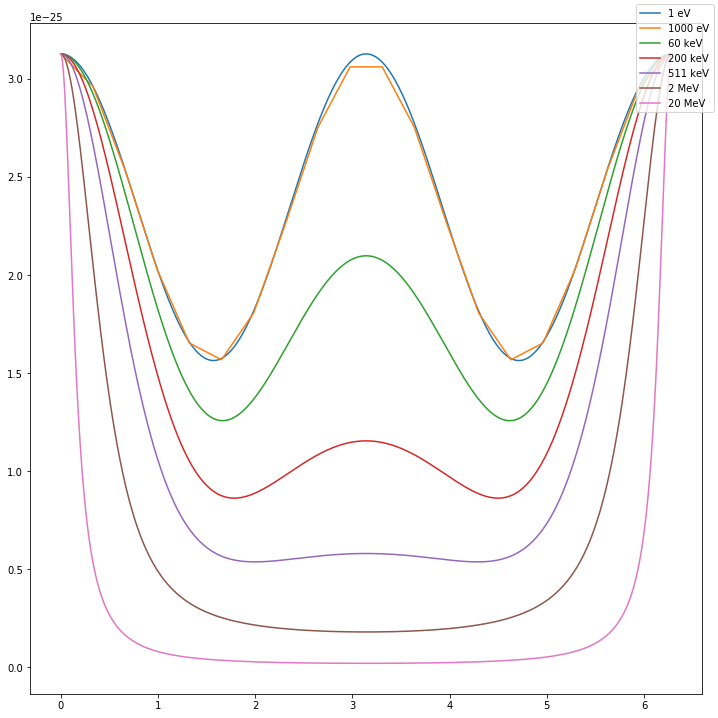

In [4]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.plot(*K_NDistribution(1, unit='eV')[::-1], label = '1 eV')
ax.plot(*K_NDistribution(1000, unit='eV', fi_number=20)[::-1], label = '1000 eV')
ax.plot(*K_NDistribution(60, unit='keV')[::-1], label = '60 keV')
ax.plot(*K_NDistribution(200, unit='kev')[::-1], label = '200 keV')
ax.plot(*K_NDistribution(511, unit='keV')[::-1], label = '511 keV')
ax.plot(*K_NDistribution(2, unit='MEV')[::-1], label = '2 MeV')
ax.plot(*K_NDistribution(20)[::-1], label = '20 MeV')
fig.legend()
plt.tight_layout()

[1] Frank H. Attix - Introduction to radiological physics and radiation dosimetry